In [1]:
import skimage as ski
import numpy as np
from skimage.util import invert
from skimage.color import rgb2gray
%matplotlib inline
import matplotlib.pyplot as plt
import os
from skimage.morphology import skeletonize, thin

filename = 'hard.png'
image = ski.io.imread(filename)
image = rgb2gray(image)
copied = image.copy()
print(np.shape(copied))
for r in range(4096):
    for i in range(4096):
        a = round(image[r][i],2)
        if a > 0.6:
            copied[r][i]= 1
        else:
            copied[r][i] = 0
print(image)
print(copied)

E:\app\conda_new\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


(4096, 4096)
[[0.65882353 0.65882353 0.65882353 ... 0.81568627 0.85098039 0.87843137]
 [0.6627451  0.65882353 0.65882353 ... 0.81176471 0.80392157 0.76470588]
 [0.6627451  0.6627451  0.6627451  ... 0.81176471 0.77647059 0.75294118]
 ...
 [0.8627451  0.8627451  0.86666667 ... 0.8        0.8        0.77254902]
 [0.86666667 0.86666667 0.87058824 ... 0.78039216 0.72156863 0.71764706]
 [0.86666667 0.86666667 0.87058824 ... 0.76078431 0.74901961 0.69803922]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


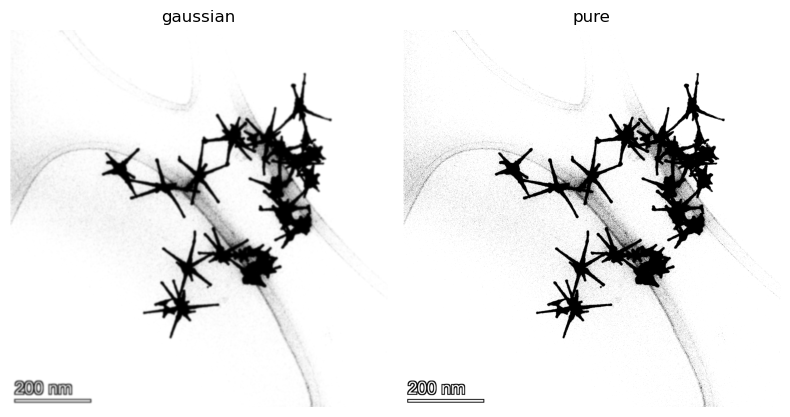

In [2]:
image = copied
for i in range(50):
    image = ski.filters.gaussian(image)

fig, axes = plt.subplots(1,2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('gaussian')
ax[0].axis('off')

ax[1].imshow(copied, cmap=plt.cm.gray)
ax[1].set_title('pure')
ax[1].axis('off')

fig.tight_layout()
plt.show()

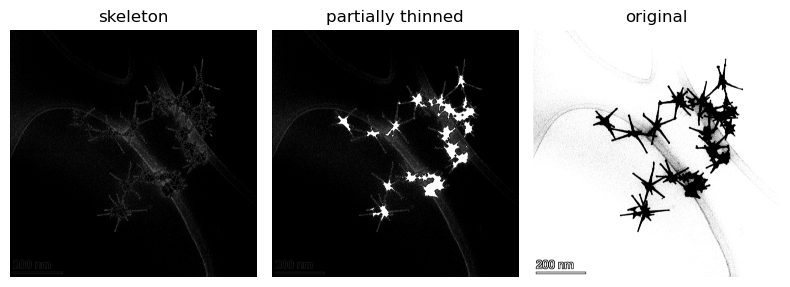

In [3]:
image = invert(copied)
skeleton = skeletonize(image)
thinned_partial = thin(image, max_num_iter=20)

fig, axes = plt.subplots(1,3, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(skeleton, cmap=plt.cm.gray)
ax[0].set_title('skeleton')
ax[0].axis('off')

ax[1].imshow(thinned_partial, cmap=plt.cm.gray)
ax[1].set_title('partially thinned')
ax[1].axis('off')

ax[2].imshow(invert(image), cmap=plt.cm.gray)
ax[2].set_title('original')
ax[2].axis('off')


fig.tight_layout()
plt.show()

In [4]:
image = skeleton
scaled_image = (image ^ np.min(image)) / (np.max(image) ^ np.min(image)) * 255
image_uint8 = scaled_image.astype(np.uint8)
ski.io.imsave('outputh.png', image_uint8)